#  Simple Linear Regression
---

### CRISP-DM Methodology
The project follows the CRISP-DM (*Cross-Industry Standard Process for Data Mining*) framework applied to **Environmental Impact Prediction**:

| **Stage** | **Objective** | **Key Actions in Notebook** |
| :--- | :--- | :--- |
| **1. Business Understanding** | Predict CO2 emissions to ensure regulatory compliance or inform consumer choice. | • Define the target: **CO2 Emissions (g/km)**.<br>• Success Criteria: Low RMSE error relative to engine size. |
| **2. Data Understanding** | Verify if "Engine Size" is a valid predictor for emissions. | • Statistical summary (`describe()`).<br>• Scatter plots to check for **Linearity** (Assumption check). |
| **3. Data Preparation** | Create a robust dataset for training. | • Feature Selection: Filter `ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION`.<br>• **Train/Test Split** (Crucial to avoid overfitting). |
| **4. Modeling** | Estimate the relationship between Engine Size and CO2. | • Train `LinearRegression` (Scikit-Learn).<br>• Interpret coefficients (Slope/Intercept). |
| **5. Evaluation** | Assess if the model is safe for production. | • Calculate R², MAE, and RMSE.<br>• **Residual Analysis** (Check for patterns in errors). |
| **6. Deployment** | (Simulation) How to use the model. | • Predict CO2 for a hypothetical new car engine.<br>• Save model (pickle) for API usage. |
---
#### Note:

Although the CRISP-DM Modeling phase typically involves comparing several algorithms to select the best performer, this project focuses, by scope definition, on implementing a baseline. Therefore, a Simple Linear Regression model will be developed, going through all stages of the cycle (analysis, preparation, and modeling) to validate the initial hypothesis.

### Installs:

In [0]:
%%capture
%pip install numpy==2.4.0
%pip install pandas==2.3.3
%pip install scikit-learn==1.8.0
%pip install matplotlib==3.10.8
%pip install seaborn==0.13.2

In [0]:
# Command to restart the kernel and update the installed libraries
%restart_python

### Imports:

In [0]:
# Data Analize and Visualization
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Modeling / Model Linear / Metrics / Save Model
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
import joblib

### Load the data

In [0]:
df = pd.read_csv('./data/FuelConsumptionCo2.csv')

### Verify successful load with some randomly selected records


In [0]:
df.sample(9)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
236,2014,CHEVROLET,ORLANDO,SUV - SMALL,2.4,4,M6,X,11.8,8.3,10.2,28,235
526,2014,INFINITI,Q50,MID-SIZE,3.7,6,AS7,Z,12.0,8.0,10.2,28,235
569,2014,JEEP,CHEROKEE,SUV - SMALL,2.4,4,A9,X,10.9,7.7,9.5,30,218
92,2014,BMW,428i COUPE,COMPACT,2.0,4,M6,Z,10.4,6.7,8.7,32,200
16,2014,ASTON MARTIN,V8 VANTAGE S,TWO-SEATER,4.7,8,AM7,Z,17.4,11.3,14.7,19,338
520,2014,HYUNDAI,TUCSON 4WD,SUV - SMALL,2.0,4,A6,X,11.4,9.3,10.5,27,242
48,2014,AUDI,R8 SPYDER,TWO-SEATER,4.2,8,A7,Z,17.6,11.0,14.6,19,336
49,2014,AUDI,R8 SPYDER,TWO-SEATER,4.2,8,M6,Z,21.2,13.4,17.7,16,407
114,2014,BMW,ACTIVEHYBRID 5,MID-SIZE,3.0,6,A8,Z,10.5,7.9,9.3,30,214


### 1. Business Understanding:
---

#### Business Goal:

Environment agencies require accurate estimates of **CO2 emissions** for new vehicle certification. **Testing every car physically is expensive**. Our goal is to create a statistical model that estimates emissions based on engine specifications with a margin of error acceptable for preliminary certification.

### 2. Data Understanding:
---

#### Dataset: `FuelConsumption.csv`

- This dataset contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64).
---

#### Variables of dataset:

* **MODELYEAR** *Integer* - The year the car model was manufactured (Note: constant value of 2014 in this sample).
* **ENGINESIZE** *Continuous* - The size of the car's engine in liters.
* **CYLINDERS** *Integer* - The number of cylinders in the engine.
* **FUELCONSUMPTION_CITY** *Continuous* - Fuel consumption rating in city driving conditions (L/100km).
* **FUELCONSUMPTION_HWY** *Continuous* - Fuel consumption rating in highway driving conditions (L/100km).
* **FUELCONSUMPTION_COMB** *Continuous* - The combined fuel consumption rating (55% city, 45% highway) in L/100km.
* **FUELCONSUMPTION_COMB_MPG** *Continuous* - The combined fuel consumption rating expressed in Miles Per Gallon (MPG).
* **CO2EMISSIONS** *Continuous* - Tailpipe emissions of carbon dioxide (in grams per kilometer). (Target Variable)


#### Exploratory Data Analysis (EDA):
---

#### Univariate Analysis:
---

Examines the behavior of **a single variable** in isolation to understand its distribution, central tendency, and dispersion (e.g., histograms and means), without seeking relationships with other data.

In [0]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [0]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [0]:
df[df.duplicated(keep = False)]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


In [0]:
data_describe = df.describe()
data_describe

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [0]:
data_describe.loc['min']

MODELYEAR                   2014.0
ENGINESIZE                     1.0
CYLINDERS                      3.0
FUELCONSUMPTION_CITY           4.6
FUELCONSUMPTION_HWY            4.9
FUELCONSUMPTION_COMB           4.7
FUELCONSUMPTION_COMB_MPG      11.0
CO2EMISSIONS                 108.0
Name: min, dtype: float64

In [0]:
data_describe.loc['max']

MODELYEAR                   2014.0
ENGINESIZE                     8.4
CYLINDERS                     12.0
FUELCONSUMPTION_CITY          30.2
FUELCONSUMPTION_HWY           20.5
FUELCONSUMPTION_COMB          25.8
FUELCONSUMPTION_COMB_MPG      60.0
CO2EMISSIONS                 488.0
Name: max, dtype: float64

In [0]:
data_describe.loc['mean']

MODELYEAR                   2014.000000
ENGINESIZE                     3.346298
CYLINDERS                      5.794752
FUELCONSUMPTION_CITY          13.296532
FUELCONSUMPTION_HWY            9.474602
FUELCONSUMPTION_COMB          11.580881
FUELCONSUMPTION_COMB_MPG      26.441425
CO2EMISSIONS                 256.228679
Name: mean, dtype: float64

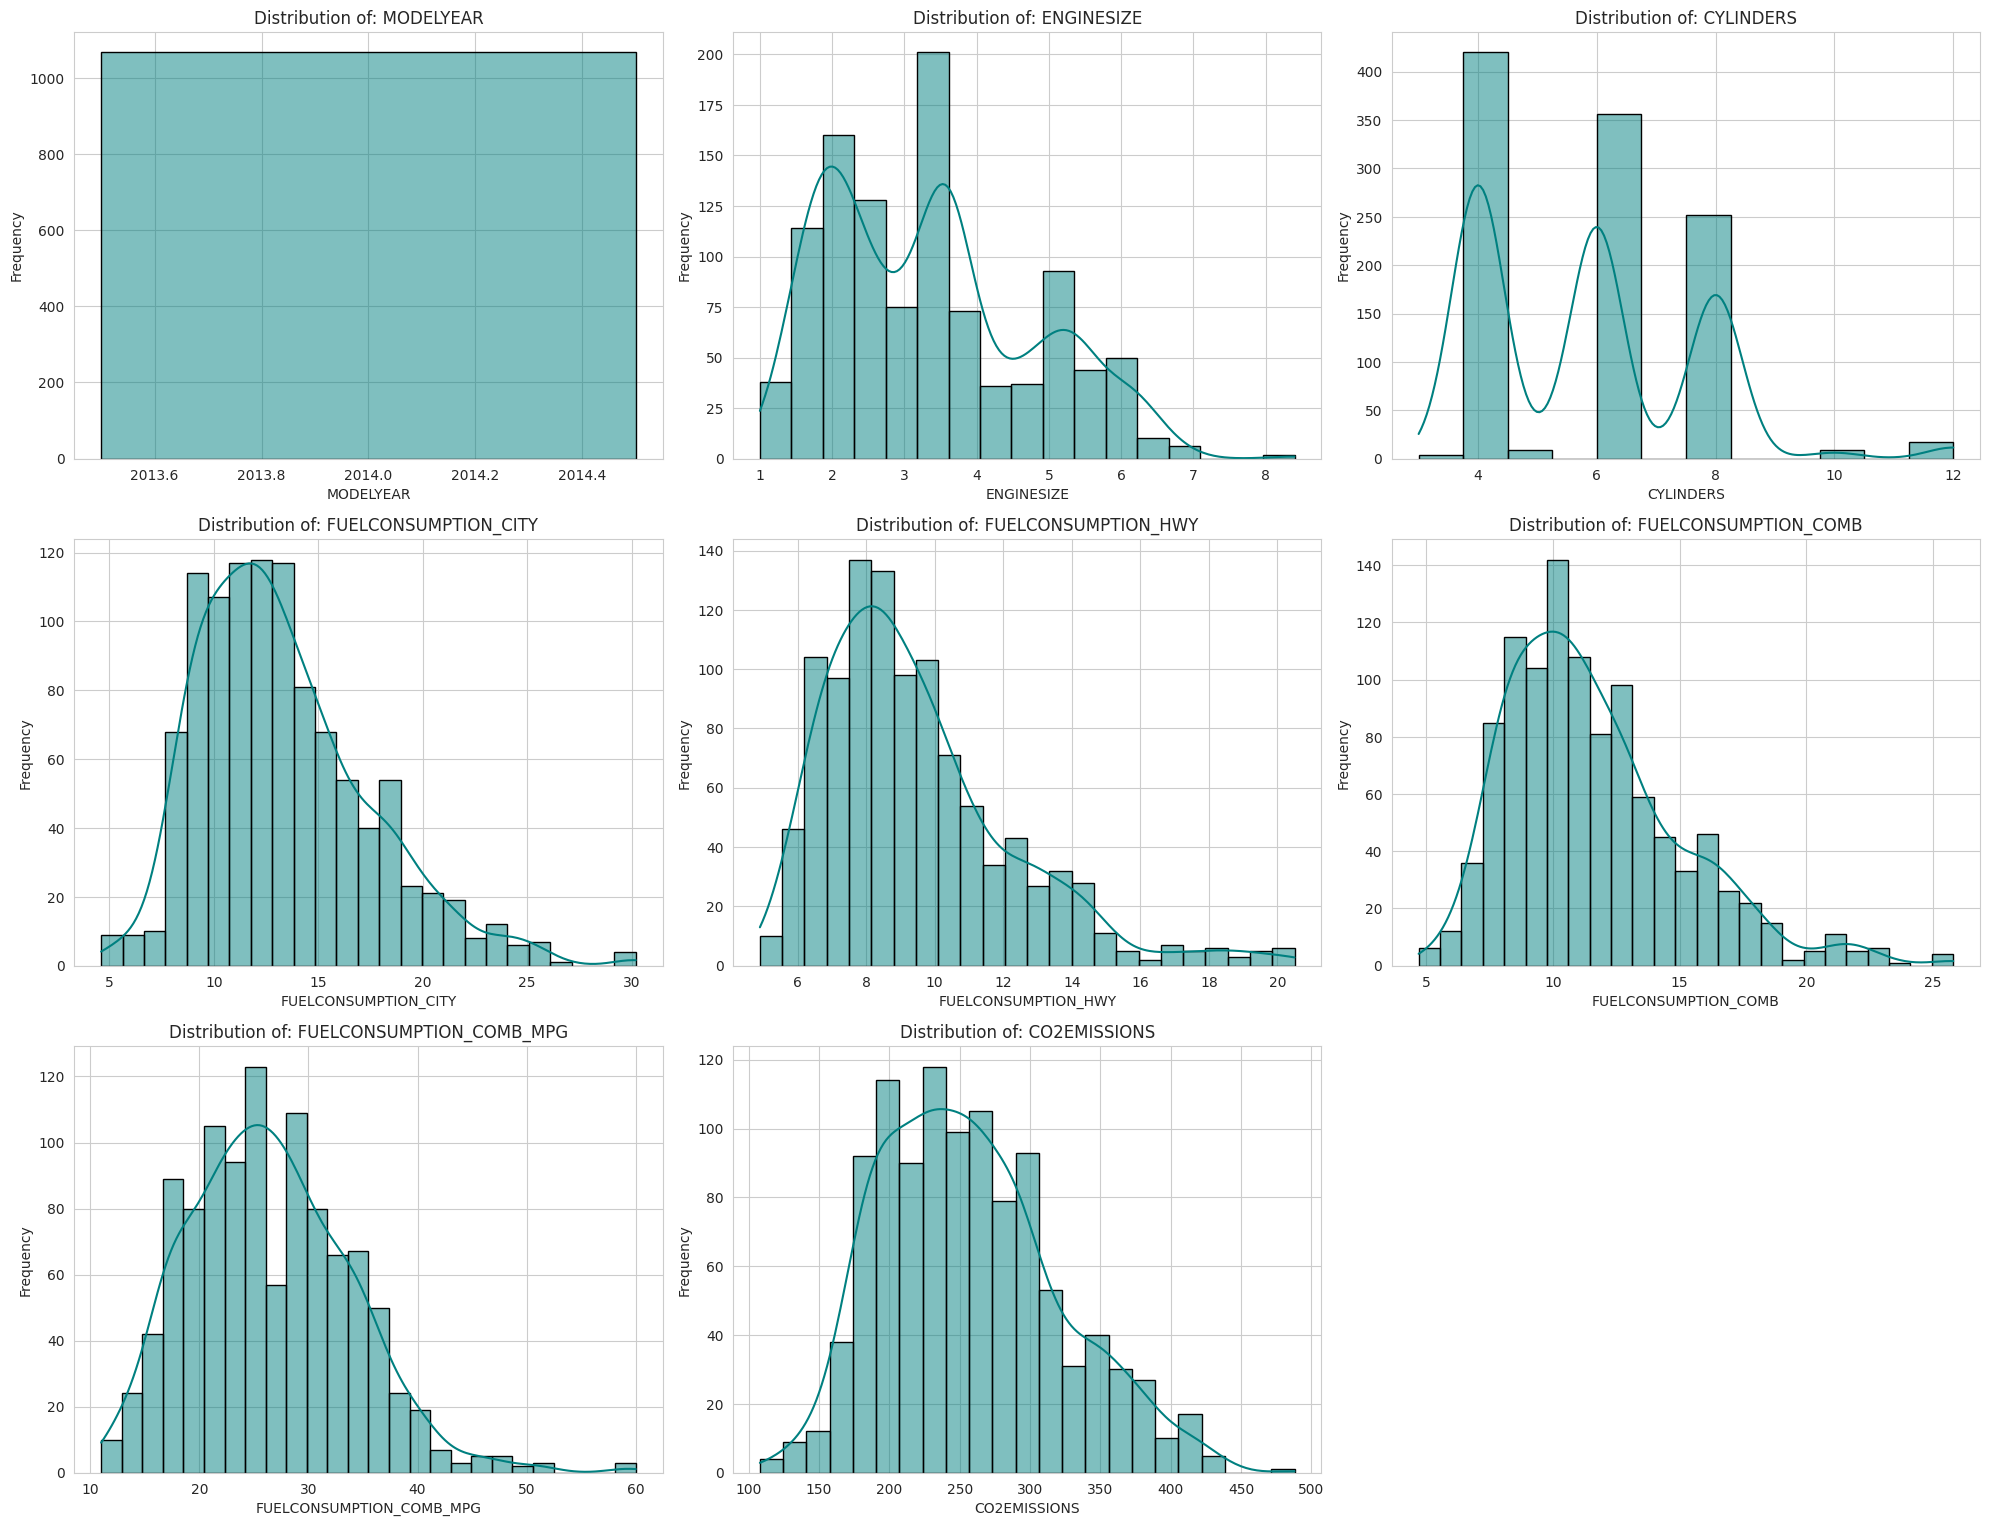

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (20, 20))

for i, col in enumerate(df.select_dtypes('number').columns):
    plt.subplot(4, 3, i + 1) # Create a grid 

    # Histogram
    sns.histplot(
        data = df[col],
        kde = True,
        edgecolor = 'black',
        color = 'teal'
    )

    plt.title(f'Distribution of: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

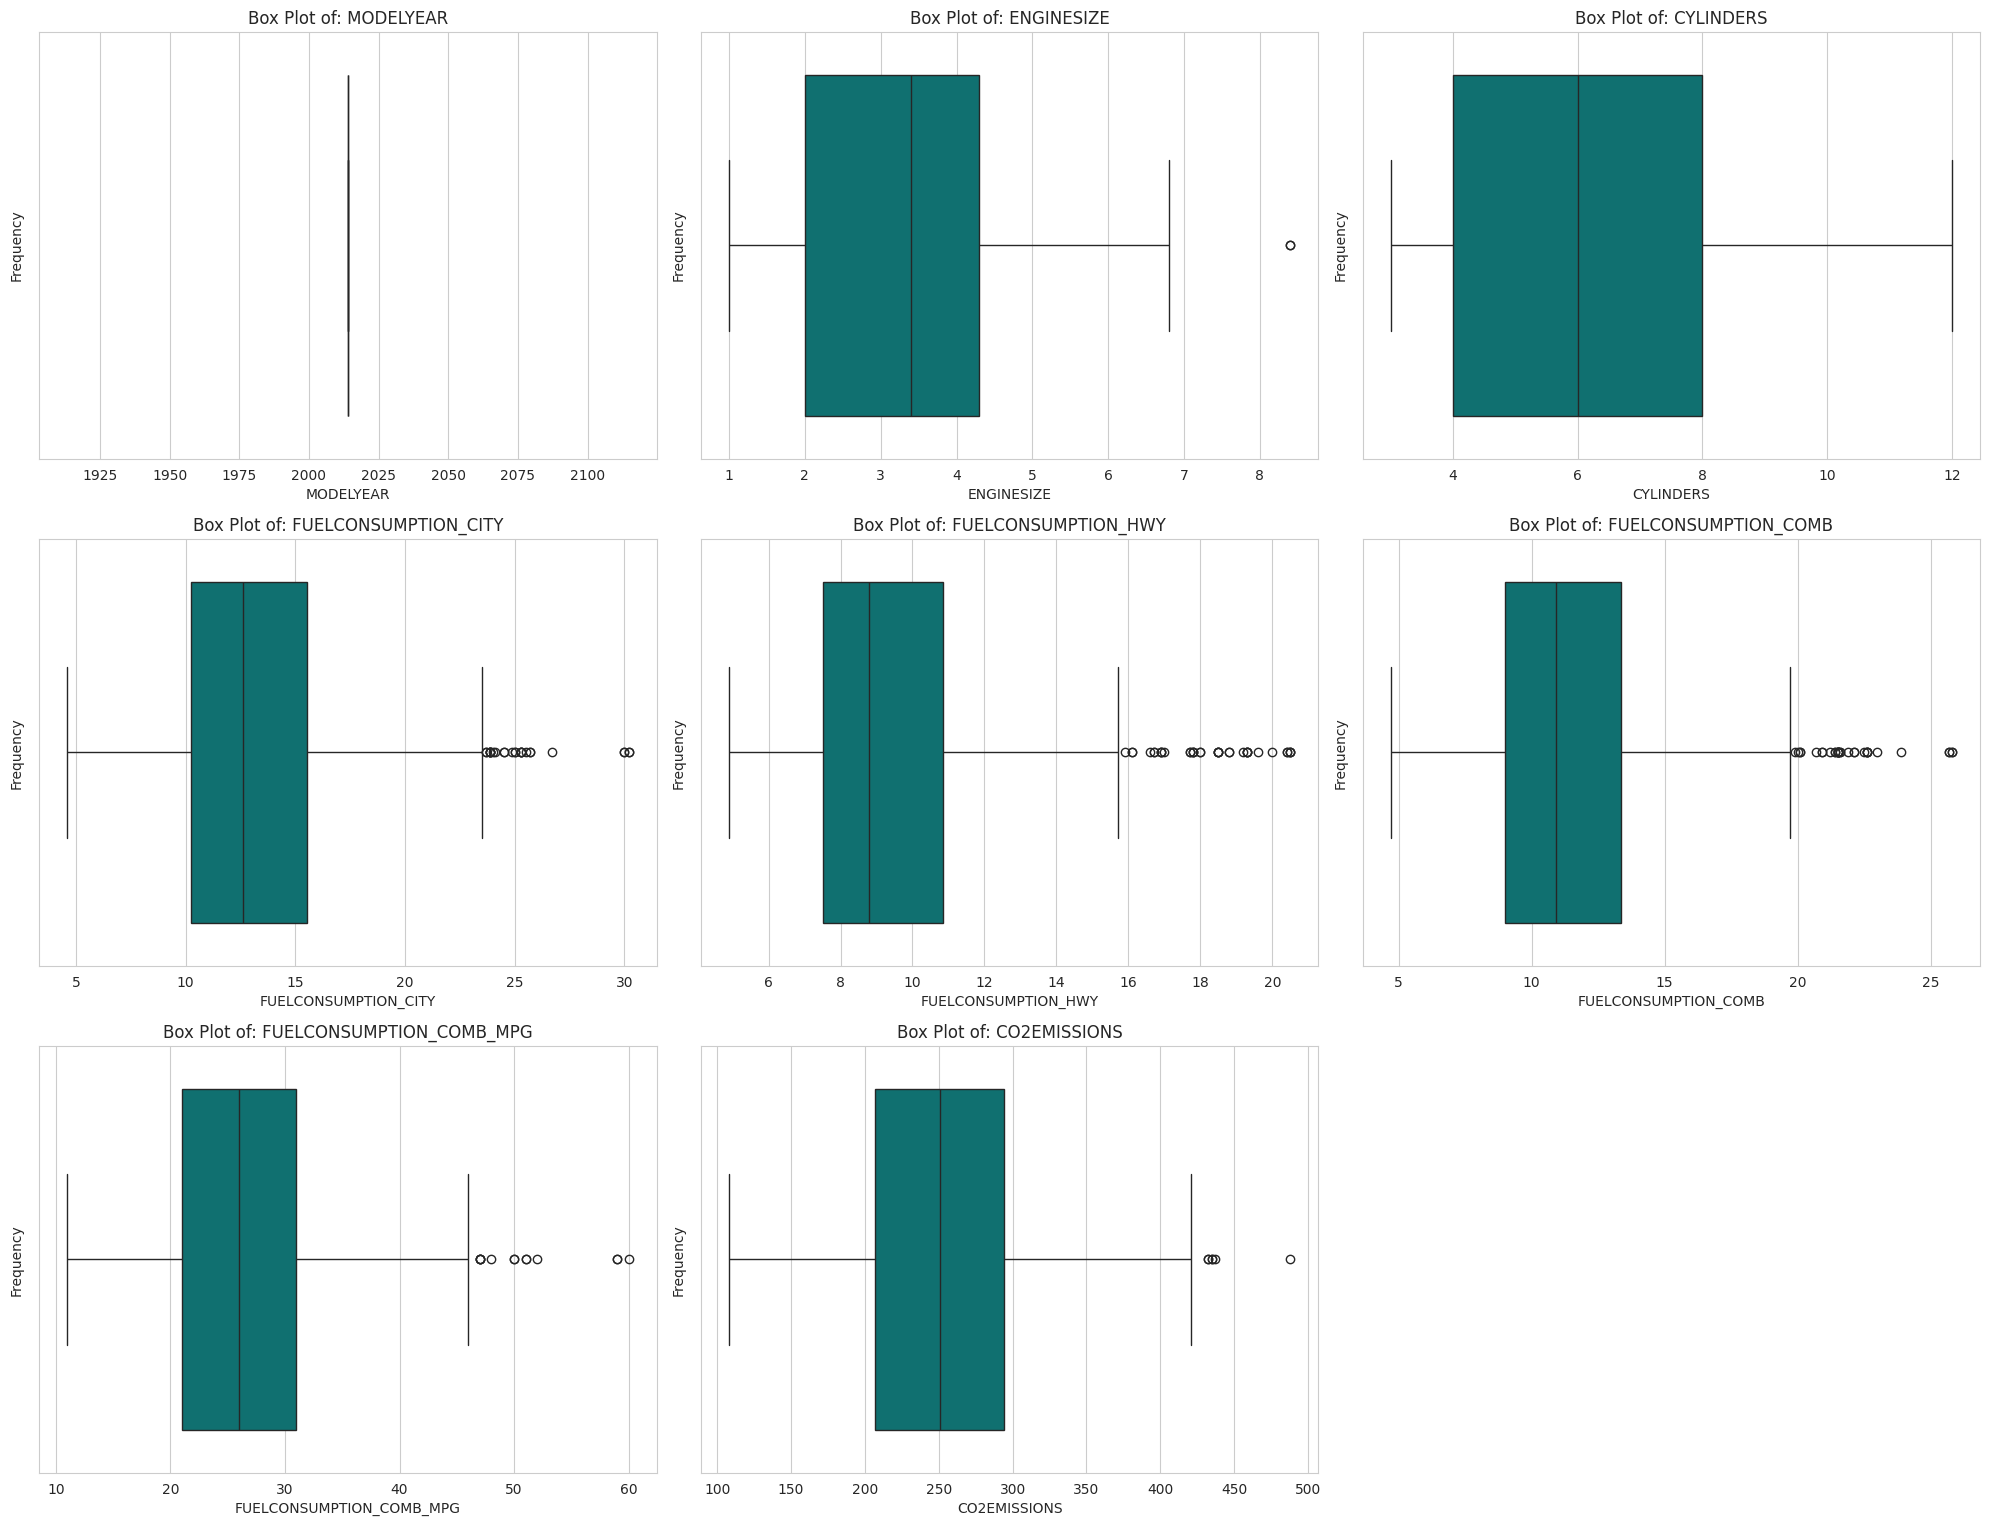

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (20, 20))

for i, col in enumerate(df.select_dtypes('number').columns):
    plt.subplot(4, 3, i + 1) # Create a grid 

    # Box Plot
    sns.boxplot(
        x = df[col],
        color = 'teal'
    )

    plt.title(f'Box Plot of: {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Key Observations & Data Scope:
---

- **Scope and Categorical Variables:** As the project scope focuses on an initial Linear Regression approach, categorical variables will not be processed at this stage, limiting the modeling to numerical features only.
---

- **MODELYEAR:** The `MODELYEAR` variable has zero variance (constant value of 2014 for all records). Since there is no variation, it does not add predictive value to the model and will be removed.
---

- **CO2EMISSIONS (Target):** The target variable shows considerable dispersion: the most efficient vehicle emits **108.0 g/km**, while the least efficient reaches **488.0 g/km**, resulting in a range of **380.0 g/km**. The average fleet emission is **256.22 g/km**. And **75%** of the cars emit up to **284.0 g**.
---

- **FUELCONSUMPTION_COMB_MPG**: Represents fuel consumption efficiency expressed in Miles per Gallon (MPG).

  - The **least efficient** vehicle in the sample travels only **11 miles per gallon** (minimum value).

  - The **most efficient** vehicle travels **60 miles per gallon** (maximum value).

  - It is observed that **75%** of the fleet has an efficiency of up to **31 miles per gallon**, indicating that vehicles with very high efficiency (above 31 MPG) make up the minority (top 25%) of the data.
---

- **Data Quality:** The dataset exhibits high initial integrity, containing no null values ​​(`NaN`) or duplicate records. Although the graphical analysis indicates the presence of outliers, these appear to represent the natural variability of the automotive market (such as high-performance sports vehicles), and not data collection errors. As a limitation, the volume of 1067 records, while sufficient for a statistically valid Linear Regression, may restrict the model's ability to generalize to more complex scenarios or outside this specific sample.


#### Bi-Variate Analysis:
---

Explores the mathematical relationship between **two variables** simultaneously to discover associations, correlations, or dependencies (e.g., scatterplot of Income vs. Debt).

#### Note: 
---
For this bivariate analysis, I pre-selected the data into **training and test sets**. The goal is to avoid **data leakage**, ensuring that all instructions are extra guidelines from the training set. Additionally, I will initially remove redundant variables to focus the analysis only on the main characteristics.

In [0]:
redundants_columns = ['MODELYEAR', 'TRANSMISSION', 'MAKE', 'MODEL', 'VEHICLECLASS', 'FUELTYPE', ]

In [0]:
train_set, test_set = train_test_split(df.drop(columns = redundants_columns), test_size = 0.2, shuffle = True,random_state=33)

In [0]:
train_set.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
795,1.6,4,9.1,6.7,8.0,35,184
653,5.0,8,17.2,12.5,15.1,19,347
136,2.0,4,10.4,6.7,8.7,32,200
594,2.4,4,10.3,8.4,9.4,30,216
138,3.0,6,12.7,9.0,11.0,26,253


#### Checking the correlations between the variables

In [0]:
train_set.corr()['CO2EMISSIONS'].abs().sort_values(ascending = False)

CO2EMISSIONS                1.000000
FUELCONSUMPTION_COMB_MPG    0.907165
FUELCONSUMPTION_CITY        0.897661
FUELCONSUMPTION_COMB        0.890924
ENGINESIZE                  0.873744
FUELCONSUMPTION_HWY         0.859161
CYLINDERS                   0.851983
Name: CO2EMISSIONS, dtype: float64

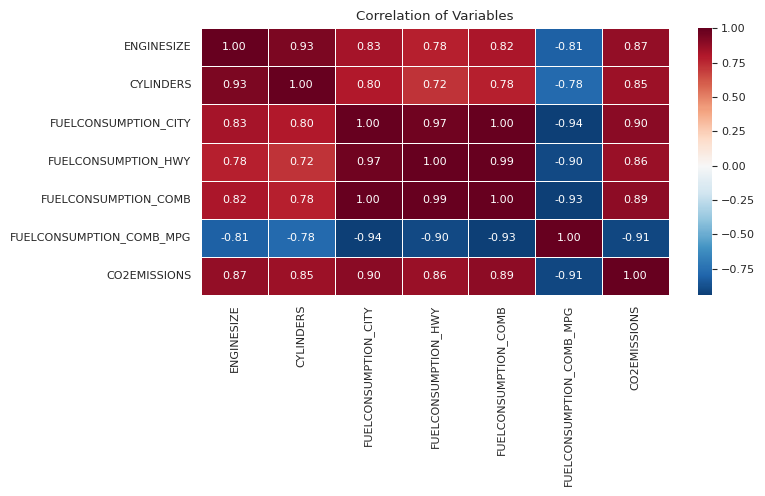

In [0]:
plt.rc('font', size = 8)
fig, ax = plt.subplots(figsize = (8, 5))
sns.heatmap(
    train_set.corr(), 
    annot = True, 
    cmap = 'RdBu_r', 
    linewidths = 0.5,
    center =  0,
    fmt = '.2f',
    ax = ax
)
ax.set_title('Correlation of Variables')
plt.tight_layout()
plt.show()

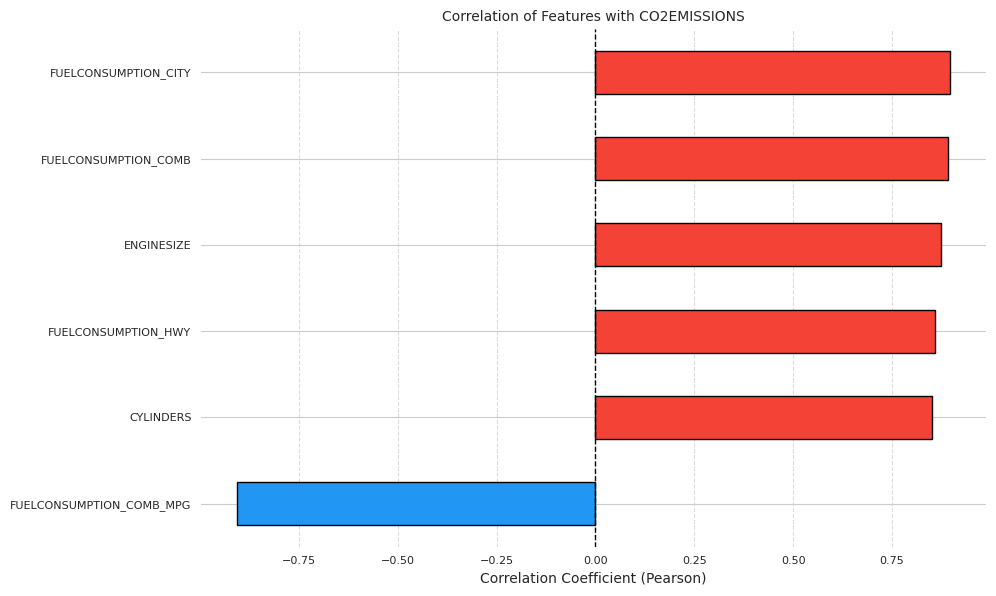

In [0]:
# Collecting data
correlation_values = train_set.corr()['CO2EMISSIONS']

if 'CO2EMISSIONS' in  correlation_values.index:
    plot_data = correlation_values.drop('CO2EMISSIONS').sort_values()

else:
    plot_data = correlation_values.sort_values()


# Colors 
colors = ['#f44336' if x > 0 else '#2196f3' for x in plot_data]

# Figure
plt.figure(figsize = (10, 6))

# Plot
plot_data.plot(
    kind = 'barh', 
    color = colors, 
    edgecolor = 'black'
)

plt.title('Correlation of Features with CO2EMISSIONS', fontsize = 10)
plt.xlabel('Correlation Coefficient (Pearson)', fontsize = 10)
plt.axvline(x = 0, color = 'black', linestyle = '--', linewidth = 1)
plt.grid(axis = 'x', linestyle = '--', alpha = 0.7)

sns.despine(left = True, bottom = True) 

plt.tight_layout()
plt.show()

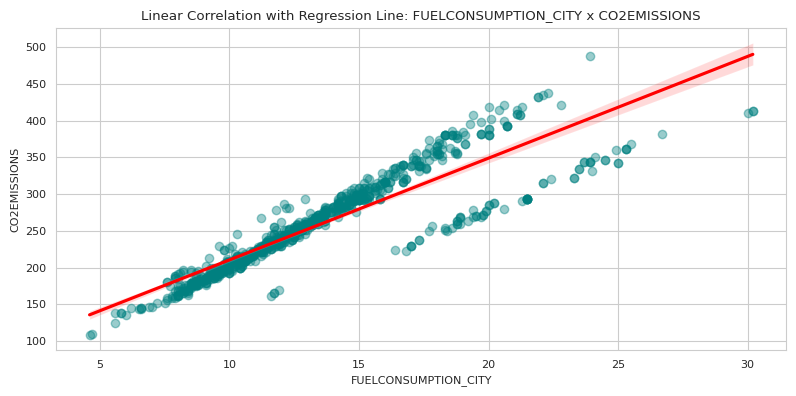

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

# scatter_kws={'alpha':0.5}: Makes the points transparent
# line_kws={'color':'red'}: Highlights the trendline in red

sns.regplot(
    x = 'FUELCONSUMPTION_CITY', 
    y = 'CO2EMISSIONS', 
    data = train_set,
    color = 'teal',
    scatter_kws = {'alpha': 0.4},
    line_kws = {'color': 'red'}
)

plt.title('Linear Correlation with Regression Line: FUELCONSUMPTION_CITY x CO2EMISSIONS')
plt.tight_layout()
plt.show()

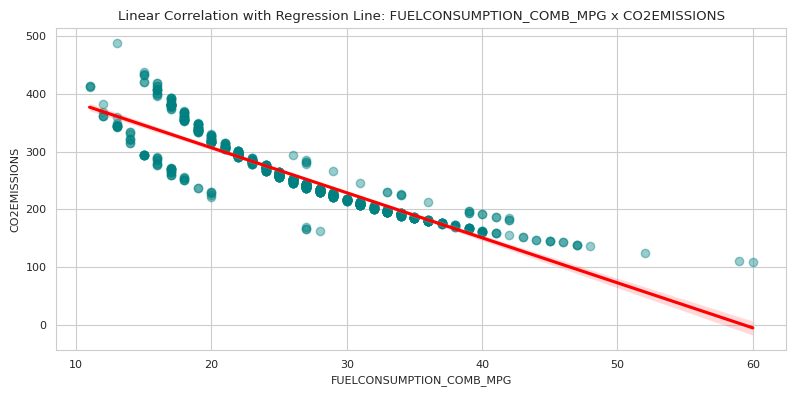

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

# scatter_kws={'alpha':0.5}: Makes the points transparent
# line_kws={'color':'red'}: Highlights the trendline in red

sns.regplot(
    x = 'FUELCONSUMPTION_COMB_MPG', 
    y = 'CO2EMISSIONS', 
    data = train_set,
    color = 'teal',
    scatter_kws = {'alpha': 0.4},
    line_kws = {'color': 'red'}
)

plt.title('Linear Correlation with Regression Line: FUELCONSUMPTION_COMB_MPG x CO2EMISSIONS')
plt.tight_layout()
plt.show()

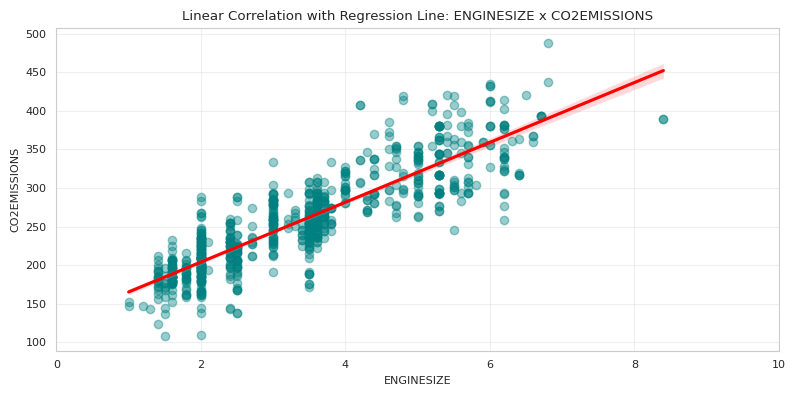

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

sns.regplot(
    x = 'ENGINESIZE', 
    y = 'CO2EMISSIONS', 
    data = train_set,
    color = 'teal',
    scatter_kws = {'alpha': 0.4},
    line_kws = {'color': 'red'}
)

plt.title('Linear Correlation with Regression Line: ENGINESIZE x CO2EMISSIONS')
plt.xlim(0, 10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

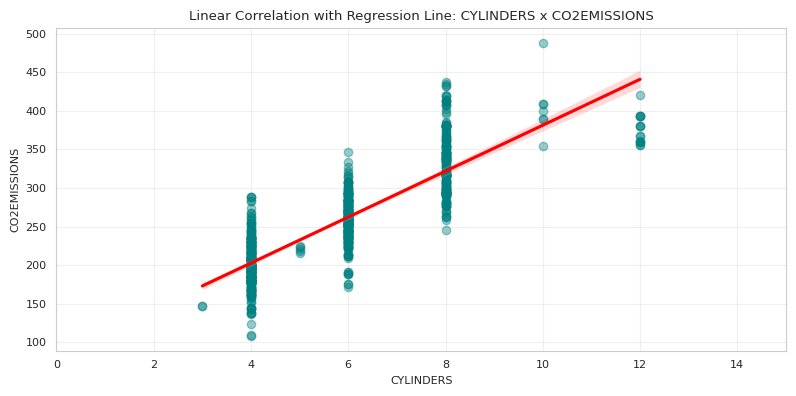

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

sns.regplot(
    x = 'CYLINDERS', 
    y = 'CO2EMISSIONS', 
    data = train_set,
    color = 'teal',
    scatter_kws = {'alpha': 0.4},
    line_kws = {'color': 'red'}
)

plt.title('Linear Correlation with Regression Line: CYLINDERS x CO2EMISSIONS')
plt.xlim(0, 15)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

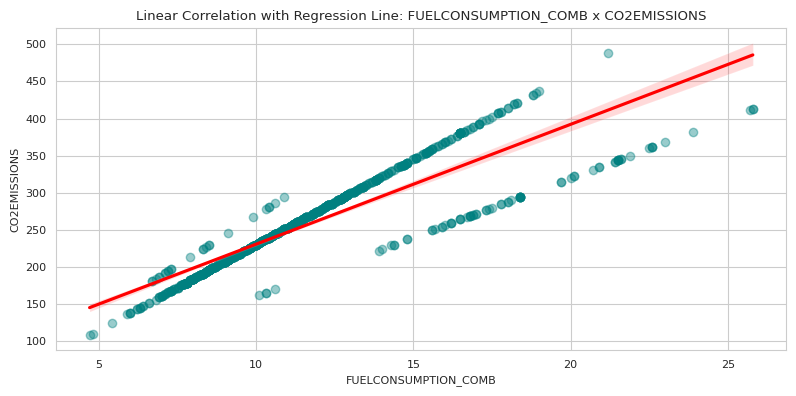

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

# scatter_kws={'alpha':0.5}: Makes the points transparent
# line_kws={'color':'red'}: Highlights the trendline in red

sns.regplot(
    x = 'FUELCONSUMPTION_COMB', 
    y = 'CO2EMISSIONS', 
    data = train_set,
    color = 'teal',
    scatter_kws = {'alpha': 0.4},
    line_kws = {'color': 'red'}
)

plt.title('Linear Correlation with Regression Line: FUELCONSUMPTION_COMB x CO2EMISSIONS')
plt.tight_layout()
plt.show()

#### Key Observations:
---

- **FUELCONSUMPTION_COMB_MPG:** This variable has the highest statistical correlation with the target (`CO2EMISSIONS`). It shows a negative correlation, indicating that the **higher** the efficiency (MPG), the **lower** the CO2 emissions. However, it will not be selected because it exhibits non-linear behavior (inverse hyperbolic curve), which violates the basic assumption of a Simple Linear Regression, which attempts to draw a straight line.
---

- **Secondary Variables (Engine, Hwy, Cylinders):** The variables `ENGINESIZE` and `CYLINDERS`, although useful, showed lower correlation coefficients than the fuel consumption variables. `FUELCONSUMPTION_HWY` represents only a partial scenario (highway), being less representative than combined fuel consumption.
---

- **The Choice (FUELCONSUMPTION_COMB):** This will be the chosen variable. With a strong positive correlation of **0.89**, it has a direct and linear physical relationship: as fuel consumption (L/100km) increases, emissions increase proportionally. Furthermore, because it is a weighted metric (55% city, 45% highway), it generalizes the vehicle's real-world behavior better than isolated measurements.
---

- **FUELCONSUMPTION_CITY:** This variable showed a linear relationship and a high correlation with the target variable `CO2EMISSIONS`. However, it only reflects fuel consumption in an urban setting (traffic, low speed). Using it in isolation would limit the model's generalizability, as it would ignore vehicle efficiency on highways, creating a scenario-specific bias.

### 3. Data Preparation:

#### Selecting variables for training and test data

In [0]:
X_train = train_set[['FUELCONSUMPTION_COMB']]
y_train = train_set['CO2EMISSIONS']

print(f'The shape of X_train is: {X_train.shape}')
print(f'\nThe shape of y_train is: {y_train.shape}')

The shape of X_train is: (853, 1)

The shape of y_train is: (853,)


In [0]:
X_test = test_set[['FUELCONSUMPTION_COMB']]
y_test = test_set['CO2EMISSIONS']

print(f'The shape of X_train is: {X_test.shape}')
print(f'\nThe shape of y_train is: {y_test.shape}')

The shape of X_train is: (214, 1)

The shape of y_train is: (214,)


### 4. Modeling:

#### Cross-Validation

In [0]:
# Create Model
model = LinearRegression()

# Defining KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 33)

# Cross-Validation
cv_scores = cross_val_score(model, X_train, y_train, cv = kfold, scoring = 'r2')

# 4. Metrics
print(f'R² for KFold: {cv_scores}')
print(f'Mean of R²: {np.mean(cv_scores):.4f}')
print(f'Standard Deviation: {np.std(cv_scores):.4f}')

R² for KFold: [0.79416754 0.79324462 0.76974262 0.78874371 0.81815564]
Mean of R²: 0.7928
Standard Deviation: 0.0154


#### Final Training

In [0]:
model.fit(X_train, y_train)

print(f'Coefficients: {model.coef_[0]}')
print(f'Intercept: {model.intercept_}')

Coefficients: 16.13882431852057
Intercept: 69.30751417188623


#### Test Model

In [0]:
y_pred = model.predict(X_test)

#### Metrics:

In [0]:
print(f'Mean Absolute error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Mean Squared error: {mean_squared_error(y_test, y_pred):.2f}')
print(f'Root men squared error: {root_mean_squared_error(y_test, y_pred):.2f}')
print(f'R2-score: {r2_score(y_test, y_pred):.2f}')

Mean Absolute error: 19.17
Mean Squared error: 736.54
Root men squared error: 27.14
R2-score: 0.80


#### Key Observations:
---

- **Cross-Validation:** The application of Cross-Validation demonstrated high stability in the model. The standard deviation of only **0.0154** between the k-folds confirms that the performance (average R² of 0.79) is consistent and not a result of chance in the separation of the data.
---

- **Generalization Test:** In the test data (never seen before), the model achieved an R² of **0.80**. This score, slightly higher than the training score, confirms that there was no *Overfitting*, indicating that the model generalizes well to new data.
---

#### Insight:
---
---

- The difference between the training **R² (0.79)** score and the test **R² (0.80)** score indicates that the data that fell into the test separation are **easier (more linearly behaved)** than the average of the training data. Since the difference is minimal (0.01), technically they converged to the same level.

### 5. Evaluation:

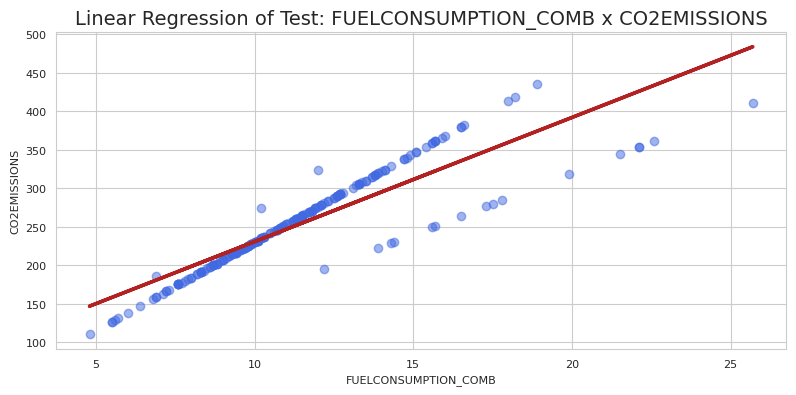

In [0]:
sns.set_style('whitegrid')

# Define Figure
plt.figure(figsize  = (8, 4))

sns.regplot(
    x = X_test, 
    y = y_test,
    fit_reg = False,
    scatter_kws = {'alpha': 0.5, 'color': 'royalblue'},
)

plt.plot(X_test, 
    y_pred,
    color='firebrick', 
    linewidth=2.5
)

plt.title('Linear Regression of Test: FUELCONSUMPTION_COMB x CO2EMISSIONS', fontsize = 14)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')

plt.tight_layout()
plt.show()

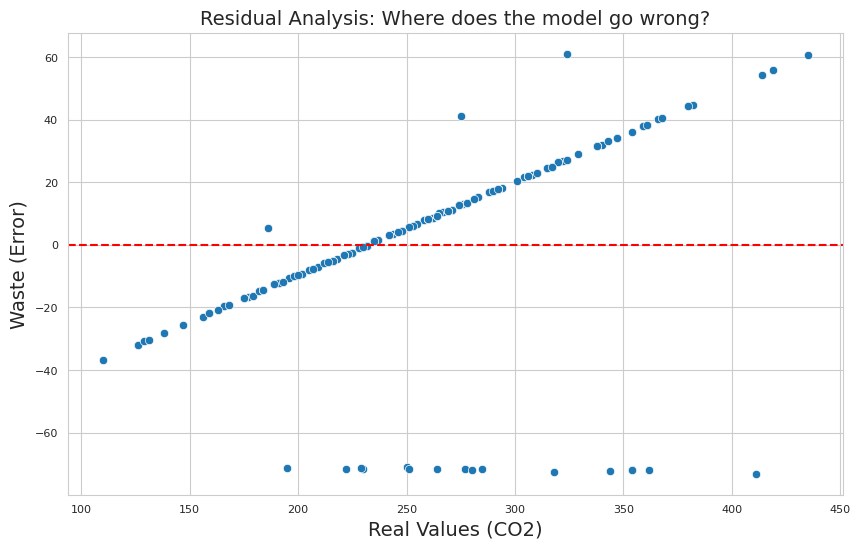

In [0]:
# Calculating residuals (Error = Actual - Predicted)
residuals = y_test - y_pred

plt.figure(figsize = (10, 6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--') 
plt.title('Residual Analysis: Where does the model go wrong?', fontsize = 14)
plt.xlabel('Real Values (CO2)', fontsize = 14)
plt.ylabel('Waste (Error)', fontsize = 14)
plt.show()

#### Key Observations:
---

#### 1. Technical Performance

  - **Explanatory Power (R² Score): 0.80**

  - The model is able to explain **80% of the variability** in CO2 emissions based solely on combined fuel consumption. This is an excellent result for a simple (univariate) linear regression model, indicating that the chosen feature (`FUELCONSUMPTION_COMB`) is highly determinant for the problem.

  - **Margin of Error (MAE): 19.17**

  - The **Mean Absolute Error** indicates that, on average, our predictions are off by **19.17 g/km** of CO2 (plus or minus). Considering that emissions vary from ~100 to ~500 g/km, an average error of 19g represents an acceptable safety margin for general estimates.

  - **Sensitivity to Large Errors (RMSE vs MAE):**

  * The **RMSE (27.14)** is higher than the MAE (19.17). This difference of ~8 points suggests that there are some **outliers** where the model errs more significantly (RMSE penalizes large squared errors). This is expected, given that we opted for a linear equation to fit a slightly curvilinear phenomenon.            
---

#### 2. Model Interpretation

  - The model generated the following linear equation:

  - **The Slope (16.14):**
  - This is the most valuable data for the business. It tells us that **for each additional liter** of fuel consumed per 100km, the car emits **16.14 grams more of CO2**. This validates the physical hypothesis of a direct positive correlation.

  - **The Intercept (69.31):**
  - Mathematically, the model suggests that a car with 0 consumption would emit 69g of CO2. **Physically, this is impossible** (a stationary car does not emit). This is just a geometric "bias adjustment" so that the line better fits the range of real data (cars that consume between 4L and 25L). For prediction purposes within the normal range of cars, this value serves as a "baseline".
---

#### 3. **Conclusion:**

- The Simple Linear Regression model proved to be robust and effective for the purpose of estimating carbon emissions.

- **Strengths:** 

- High explainability (80%), simplicity of implementation, and low computational cost. Cross-validation confirmed that the model did not suffer from *overfitting*.

- **Limitations:**

- The difference between RMSE and MAE indicates that simple linearity does not perfectly capture extreme cases (very fuel-efficient or very polluting cars).

- Technical Note: A residual analysis (performed separately) suggests heteroscedasticity, indicating that the model may be mixing different types of fuels.

### 6. Deployment:
---

In [0]:
# Save Model
joblib.dump(model, './artifacts/Model_co2_v1.pkl')


['./artifacts/Model_co2_v1.pkl']

In [0]:
def predict_emission(fuelconsumption_comb):
    # 1. Loading Model
    model = joblib.load('./artifacts/Model_co2_v1.pkl')

    # 2. Create a DataFrame with the EXACT column name from the training session.
    input_data = pd.DataFrame([[fuelconsumption_comb]], columns=['FUELCONSUMPTION_COMB'])

    # 3. Prediction
    prediction_model = model.predict(input_data)
    
    return f"For a fuel consumption of {fuelconsumption_comb} L/100km, the predicted omission is: {prediction_model[0]:.2f} g/km"

# Teste Final
print(predict_emission(15.5))

For a fuel consumption of 15.5 L/100km, the predicted omission is: 319.46 g/km
